In [1]:
from threading import Thread
import random

In [2]:
import multiprocessing

numberOfCores = multiprocessing.cpu_count()
print ("Num of cores are: ", numberOfCores)

Num of cores are:  8


In [3]:
import threading

activeThread = threading.active_count()
print ("Num of threads: ",activeThread)

Num of threads:  6


In [4]:
def matrix_gen(bounds, n, m):
    mat = []
    for i in range(n):
        row = [random.randint(bounds[0], bounds[1]) for _ in range(m)]
        # print(row)
        mat.append(row)
        # print(mat)
    return mat

In [5]:
def display(mat):
    for i in range(len(mat)):
        print(mat[i])

In [6]:
mat = matrix_gen((-100,100),50,50)

In [7]:
import threading
import time

def worker():
    print("Thread started")
    time.sleep(2)  # Simulate some work
    print("Thread finished")

# Create and start multiple threads
threads = []
for _ in range(3):
    t = threading.Thread(target=worker)
    t.start()
    threads.append(t)
    

active_threads = threading.active_count()
print("Number of active threads:", active_threads)
# Wait for all threads to finish
for t in threads:
    t.join()

# Get the number of active threads
active_threads = threading.active_count()
print("Number of active threads:", active_threads)

Thread started
Thread started
Thread started
Number of active threads: 9
Thread finished
Thread finished
Thread finished
Number of active threads: 6


In [8]:
def matrix_multiply(matrix1, matrix2):
    k = len(matrix1)
    result = [[0 for _ in range(k)] for _ in range(k)]
    for i in range(k):
        for j in range(k):
            for l in range(k):
                result[i][j] = matrix1[i][l] * matrix2[l][j]

    return result

#  Matrix Multiplication Using Multi-Threading

In [9]:
matrix_dim = 10
num_threads_range = 20
M = matrix_gen((-10,10), 10,10)
execution_times = [0.0 for _ in range(num_threads_range)]

In [10]:
display(M)

[-1, 3, -5, -5, -1, -8, 6, -10, -9, -2]
[4, 7, -1, -1, 6, 10, 6, -7, 4, -9]
[10, -1, -9, -3, -7, -2, 9, 9, -1, -9]
[-8, 1, 9, 10, 4, 7, 1, -5, 1, -5]
[-6, 6, 3, 7, -2, -8, 8, -4, -7, -3]
[1, 6, 10, -2, 8, 2, -5, -4, 7, -8]
[0, 4, -4, 4, 1, 1, 1, -2, 5, -1]
[0, -10, 8, -4, -1, -10, 7, 8, 9, -3]
[-10, 2, -4, -1, 0, -5, -2, 5, 2, 6]
[-6, -9, -10, 5, -4, -10, -2, 6, 0, 3]


In [11]:
def perform_matrix_multiplication(M, num_matrices=100):
    dimension = len(M)
    for num_threads in range(1, num_threads_range + 1):  # iterating over different numbers of threads to check for performance
        threads = []
        start_time = time.time()       # timer started
        for _ in range(num_matrices): 
            # creating multiple random matirx to be multiplied by matirx M
            random_matrices = [[[round(random.uniform(0, 1), 2) for _ in range(dimension)] for _ in range(dimension)] for _ in range(num_matrices)]    

            # multplying each matrix in list of matrix in random_matrices 
            for matrix in random_matrices:
                thread = threading.Thread(target=matrix_multiply, args=(M, matrix))  # created a thread 
                threads.append(thread)
                thread.start()     # straing the thread 

            for thread in threads: 
                thread.join()   # waiting for all the thereds to finish 

        end_time = time.time()    # ending time , time taken to multiply all the matrix when number of threads are varying in range
        execution_times[num_threads - 1] = end_time - start_time    # storing this time in a list 
    return execution_times

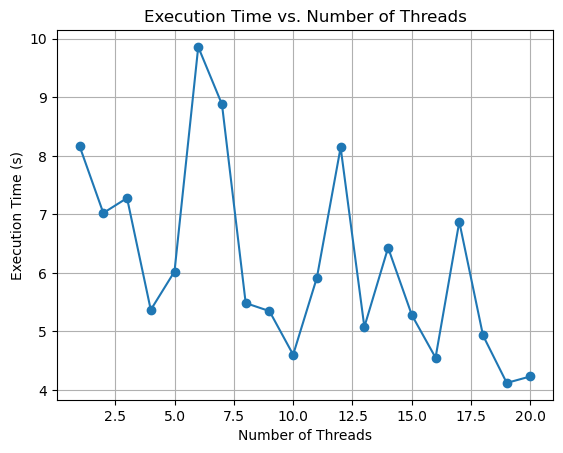

In [13]:
import matplotlib.pyplot as plt

# Your data
num_threads = list(range(1, num_threads_range + 1))  # Assuming num_threads_range is defined elsewhere
execution_times = perform_matrix_multiplication(M, 100)  # Assuming perform_matrix_multiplication is defined elsewhere

# Plotting
plt.plot(num_threads, execution_times, marker='o', linestyle='-')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Number of Threads')
plt.grid(True)
plt.show()

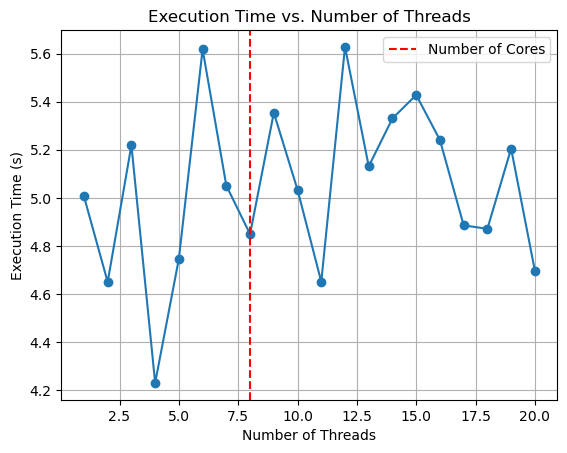

In [14]:
import matplotlib.pyplot as plt

# Your data
num_cores = 8
num_threads = list(range(1, num_threads_range + 1))
execution_times = perform_matrix_multiplication(M, 100)

# Plotting
plt.plot(num_threads, execution_times, marker='o', linestyle='-')
plt.axvline(x=num_cores, color='r', linestyle='--', label='Number of Cores')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Number of Threads')
plt.grid(True)
plt.legend()
plt.show()

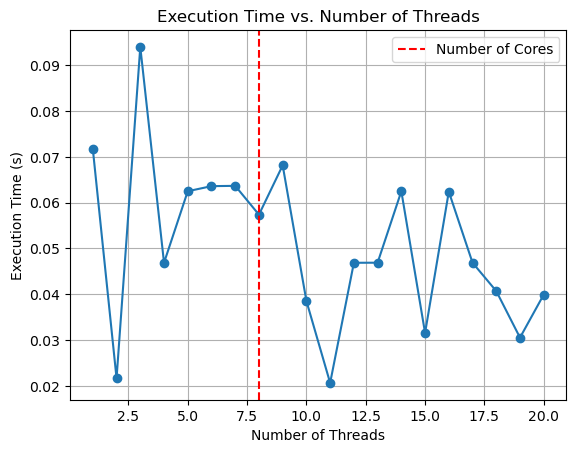

In [15]:
import matplotlib.pyplot as plt

# Your data
num_cores = 8
num_threads = list(range(1, num_threads_range + 1))
execution_times = perform_matrix_multiplication(M, 10)

# Plotting
plt.plot(num_threads, execution_times, marker='o', linestyle='-')
plt.axvline(x=num_cores, color='r', linestyle='--', label='Number of Cores')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Number of Threads')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
!pip install tabulate
from tabulate import tabulate

# Your data
num_threads = list(range(1, num_threads_range + 1))
execution_times = perform_matrix_multiplication(M, 100)

# Organize the data into a list of tuples for tabulate
data = [(num_threads[i], execution_times[i]) for i in range(len(num_threads))]

# Print the table
print(tabulate(data, headers=["Number of Threads", "Execution Time (s)"], tablefmt="pretty"))

+-------------------+--------------------+
| Number of Threads | Execution Time (s) |
+-------------------+--------------------+
|         1         | 3.754941940307617  |
|         2         | 3.9277820587158203 |
|         3         | 4.268388032913208  |
|         4         | 4.003300189971924  |
|         5         | 4.133854389190674  |
|         6         | 4.511690378189087  |
|         7         | 6.257082939147949  |
|         8         | 5.620122194290161  |
|         9         | 5.9703803062438965 |
|        10         | 5.186432600021362  |
|        11         | 4.734732627868652  |
|        12         | 4.825687408447266  |
|        13         | 5.528648138046265  |
|        14         | 5.256199598312378  |
|        15         | 4.828457355499268  |
|        16         | 5.479138135910034  |
|        17         | 5.453505039215088  |
|        18         | 3.771824598312378  |
|        19         |  4.93650221824646  |
|        20         |  4.29488205909729  |
+----------